In [1]:
import gym
import gym_envs
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

env = gym.make("CliffWalker-v0")
env.render()

action_size = env.action_space.n
state_size = env.observation_space.n

epsilon = 0.1
gamma = 1
epoch = 500
alpha = 0.3

initial_seed = 0
max_steps = 100

['_', '_', '_', '_', '_', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', '_', '_', '_', '_', '_']
['_', '_', '_', '_', '_', '_', '_', '_', '_', '_']
['O', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'G']



In [2]:
table_q = np.zeros((state_size, action_size))

done = False
reward_list = []

seed = initial_seed
env.seed(seed)
total_reward = 0

for episode in np.arange(epoch):
    state = env.reset()
    action = 0
    for step in np.arange(max_steps):
        if env.np_random.uniform() <= epsilon:
            action = env.np_random.randint(env.action_space.n)
        else:
            action = np.argmax(table_q[state,:])
            
        next_state, reward, done, _ = env.step(action)
        table_q[state, action] = table_q[state,action] + alpha*(reward + gamma*np.max(table_q[next_state,:]) - table_q[state,action])
        total_reward+=reward
        
        if done or step==(max_steps-1):
            reward_list.append(total_reward/(episode+1))
            seed+=1
            env.seed(seed)
            break
        else:
            state = next_state

In [3]:
table_q_s = np.zeros((state_size, action_size))

done = False
reward_list_s = []
seed = initial_seed
env.seed(seed)
total_reward = 0

for episode in np.arange(epoch):
    state = env.reset()
    action = 0
    next_action = 0
    
    if env.np_random.uniform() <= epsilon:
        action = env.np_random.randint(env.action_space.n)
    else:
        action = np.argmax(table_q_s[state,:])
            
    for step in np.arange(max_steps):
        next_state, reward, done, _ = env.step(action)
        if env.np_random.uniform() <= epsilon:
            next_action = env.np_random.randint(env.action_space.n)
        else:
            next_action = np.argmax(table_q_s[next_state,:])  
        
        table_q_s[state,action] = table_q_s[state,action] + alpha*(reward + gamma*table_q_s[next_state, next_action]-table_q_s[state,action])
        total_reward+=reward
        
        if done or step==(max_steps-1):
            reward_list_s.append(total_reward/(episode+1))
            seed+=1
            env.seed(seed)
            break
        else:
            state = next_state
            action = next_action

Text(0,0.5,'Reward')

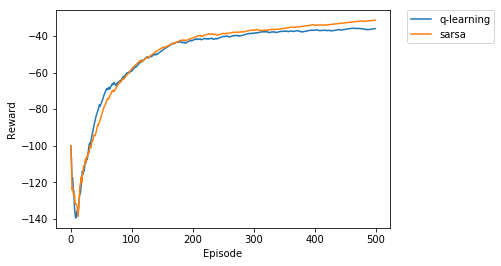

In [4]:
plt.plot(reward_list, label='q-learning')
plt.plot(reward_list_s, label='sarsa')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Episode')
plt.ylabel('Reward')